# NearestMeanResponseImputer

This notebook shows the functionality of the NearestMeanResponseImputer class. This transformer takes the mean of the response column for each value present in the column to be imputed, it then compares these values to the mean of the response column for the null entries, and finally fills nulls with the value for which the two means are closest.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
import tubular
from tubular.imputers import NearestMeanResponseImputer

In [3]:
tubular.__version__

'0.2.15'

## Motivation

This transformer is designed to fill null values with the value for which they will have the least impact on the mean of the response, below is a simple motivating example.

Using column "b" as the response, we first produce a plot of the mean response for each none null value.

In [4]:
df=pd.DataFrame(
    {
    "a": [1, 1, 1, 2, 2, 3, np.nan],
    "b": [6, 2, 1, 5, 7, 5, 6]
    }
)

ax=df[df.notnull()].groupby('a').mean().plot(xticks=[1,2,3], ylim=(3,6),legend=False)
ax.set_ylabel('mean_b')


Text(0, 0.5, 'mean_b')

Next we fill the null values with their nearest neighbour, notice in this plot that we have shifted the mean for the leftmost group.

Text(0, 0.5, 'mean_b')

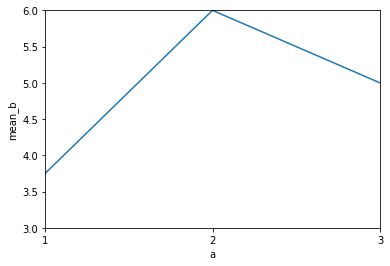

In [5]:
df=pd.DataFrame(
    {
    "a": [1, 1, 1, 2, 2, 3, 1],
    "b": [6, 2, 1, 5, 7, 5, 6]
    }
)
ax=df[df.notnull()].groupby('a').mean().plot(xticks=[1,2,3], ylim=(3,6), legend=False)
ax.set_ylabel("mean_b")

Finally we fill the null values as NearestMeanResponseImputer would, notice that in this plot the group means agree with those in the initial plot.

Text(0, 0.5, 'mean_b')

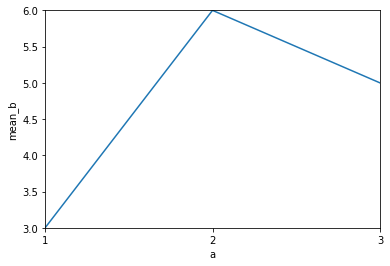

In [6]:
df=pd.DataFrame(
    {
    "a": [1, 1, 1, 2, 2, 3, 2],
    "b": [6, 2, 1, 5, 7, 5, 6]
    }
)

ax = df[df.notnull()].groupby('a').mean().plot(xticks=[1,2,3], ylim=(3,6), legend=False)
ax.set_ylabel("mean_b")

## Load California housing dataset from sklearn

In [7]:
cali = fetch_california_housing()
cali_df = pd.DataFrame(cali['data'], columns=cali['feature_names'])
cali_df['target'] = cali['target']
cali_df['HouseAge'] = cali_df['HouseAge'].sample(frac=0.95, random_state=2)
cali_df['Population'] = cali_df['Population'].sample(frac=0.995, random_state=3)

In [8]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
cali_df.isnull().sum()

MedInc           0
HouseAge      1032
AveRooms         0
AveBedrms        0
Population     103
AveOccup         0
Latitude         0
Longitude        0
target           0
dtype: int64

## Simple Usage

### Initialising NearestMeanResponseimputer

In [10]:
imp1 = NearestMeanResponseImputer(
    response_column='target',
    columns=['HouseAge', 'Population'],
    copy=True,
    verbose=True
)

BaseTransformer.__init__() called


### NearestMeanResponseImputer Fit

The fit method for NearestMeanResponseImputer must be run before the transform method. It computes the values which each relevant columns null entries will be imputed with, which are stored as an attribute called impute_values_. This attribute is a dictionary with keys matching the relevant column names.

In [11]:
imp1.fit(cali_df)

BaseTransformer.fit() called


NearestMeanResponseImputer(columns=['HouseAge', 'Population'],
                           response_column='target')

In [12]:
imp1.impute_values_

{'HouseAge': 30.0, 'Population': 451.0}

### NearestMeanResponseImputer Transform

The transform method for NearestMeanResponseImputer takes a pandas dataframe as input and will fill null values in the relevant columns with the impute values learned in the fit step.

In [13]:
cali_df2=imp1.transform(cali_df)

BaseTransformer.transform() called


In [14]:
cali_df2.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

## Alternate Usage - DEPRECATED

We can also use this transformer in the event that we want to fill null values in our test set with impute values learned from our training set. In particular, if our training set contains no null values and our test set does, we can specify use_median_if_no_nulls as True in the fit stage so that our imputer will learn the median values of our training columns.

**=> In this use case please use the MedianImputer**